# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Закомментируйте строку ниже для запуска локально
#from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально используйте:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf



def uniform(size=1, precision=30):
    degs = 2**(np.arange(1, precision+1))

    if type(size) is int:
        _size = np.array([size])
    else:
        _size = np.array(size)
    
    num_elements = np.prod(_size)
    coins = np.array(coin(precision*num_elements)).reshape(np.append(_size, precision))
    return (coins/degs).sum(axis=len(_size))


def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)
    values = uniform(size)

    plt.figure(figsize=(15, 5))
    plt.scatter(x=values, y=np.zeros(size), alpha=0.4, label='Значение случайной величины')
    plt.hist(x=values, bins=20, density=True, alpha=0.4, label='Гистограмма выборки')
    plt.plot(grid, uniform_pdf(grid), lw=3, color='r', label='Плотность случайной величины')
    plt.ylim((-0.25, 2))

    plt.title('Равномерное распределение точек на отрезке [0, 1]')
    plt.legend()
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 8))

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)

        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha= 0.4 if i<4 else 0.2
        )
        plt.xlim((-0.1, 1.1))
        plt.xlabel('precision={}'.format(precision))
        
        plt.yticks([])
        if i < 4:
            plt.xticks([])
            
    plt.suptitle('Зависимость значения случайных величин от точности')
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=1):
    x = 1 - uniform(size, precision)
    y = 1 - uniform(size, precision)

    return (np.sqrt(-2 * np.log(x)) * np.cos(2 * np.pi * y)) * scale + loc


def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)
    values = normal(size, precision=30)

    plt.figure(figsize=(15, 5))
    plt.scatter(x=values, y=np.zeros(size), alpha=0.4, label='Значение случайной величины')
    plt.hist(x=values, bins=20, density=True, alpha=0.4, label='Гистограмма выборки')
    plt.plot(grid, norm_pdf(grid), lw=3, color='r', label='Плотность случайной величины')
    plt.ylim((-0.05, 0.5))
    plt.xlim((-3.25, 3.25))

    plt.title('Нормальное распределение')
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    values = uniform(size, precision)
    return -np.log(1 - values) / lambd


def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)
    values = expon(size, precision=30)

    plt.figure(figsize=(15, 5))
    plt.scatter(x=values, y=np.zeros(size), alpha=0.4, label='Значение случайной величины')
    plt.hist(x=values, bins=20, density=True, alpha=0.4, label='Гистограмма выборки')
    plt.plot(grid, expon_pdf(grid), lw=3, color='r', label='Плотность случайной величины')
    plt.ylim((-0.05, 1.1))
    plt.xlim((-0.1, 5.1))

    plt.title('Экспоненциальное распределение')
    plt.legend()
    return plt.gcf()

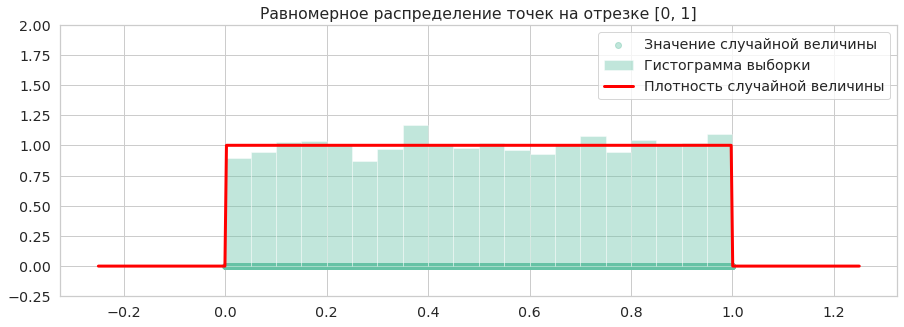

In [97]:
plot_uniform_density(5000)
plt.show()

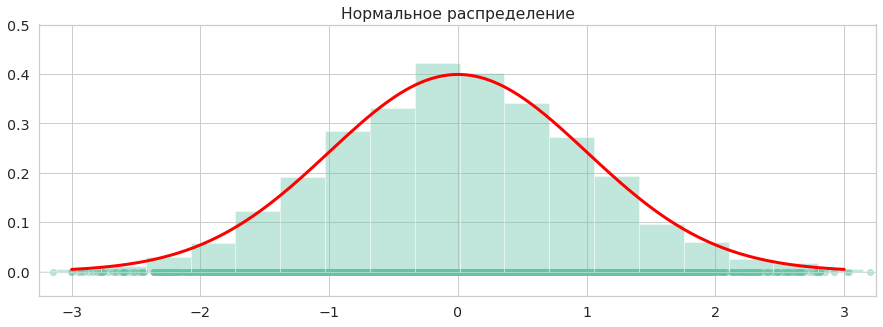

In [98]:
plot_normal_density(5000)
plt.show()

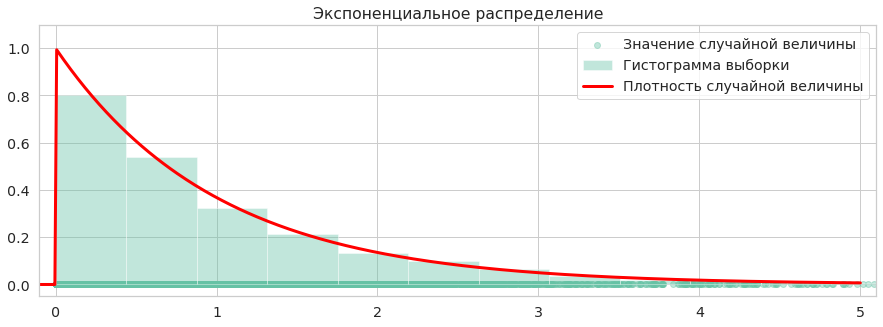

In [99]:
plot_expon_density(5000)
plt.show()

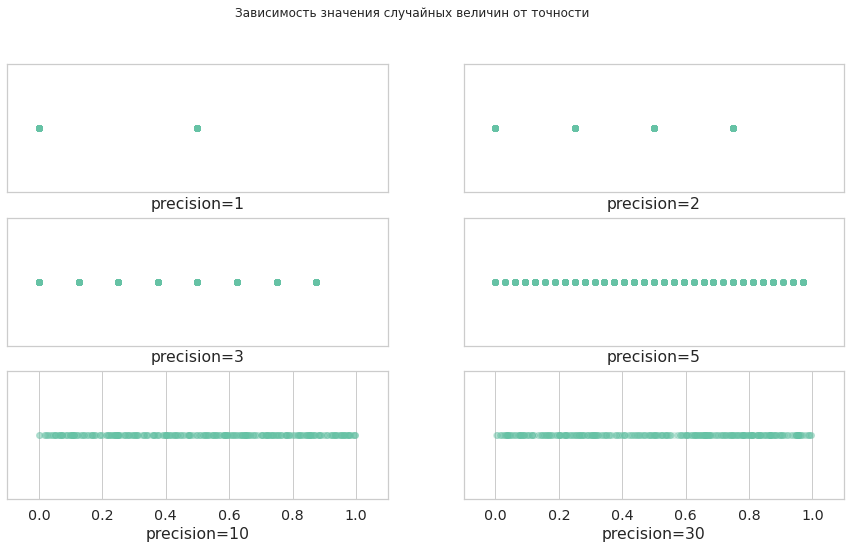

In [109]:
plot_uniform_different_precision(size=500)
plt.show()

**Выводы:**

Из графиков распределений можно сделать вывод, что наше двоичное представление чисел из отрезка [0, 1] имеет место и довольно неплохо ложится под распределения.

По поводу параметра $precision$ можно сказать, что даже при малых значениях (<10) цвета точек неотличимы и что распределение равномерно, но всё же их брать не стоит, потому что уникальных значений точек будет не более ~1000, а это может плохо сказаться при анализе с точки зрения теории вероятностей.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

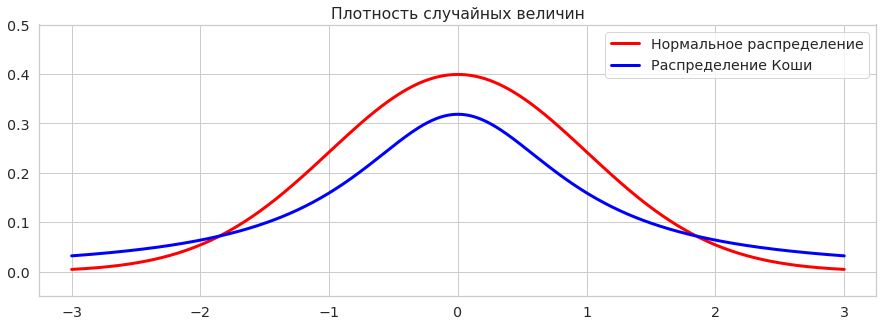

In [4]:
from scipy.stats import cauchy

grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(15, 5))
plt.plot(grid, norm_pdf(grid), lw=3, color='r', label='Нормальное распределение')
plt.plot(grid, cauchy.pdf(grid), lw=3, color='b', label='Распределение Коши')
plt.ylim((-0.05, 0.5))
plt.xlim((-3.25, 3.25))

plt.title('Плотность случайных величин')
plt.legend()

Графики довольно схожи, но видно, что плотность при распределении Коши убывает куда медленнее, нежели при нормальном распределении.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

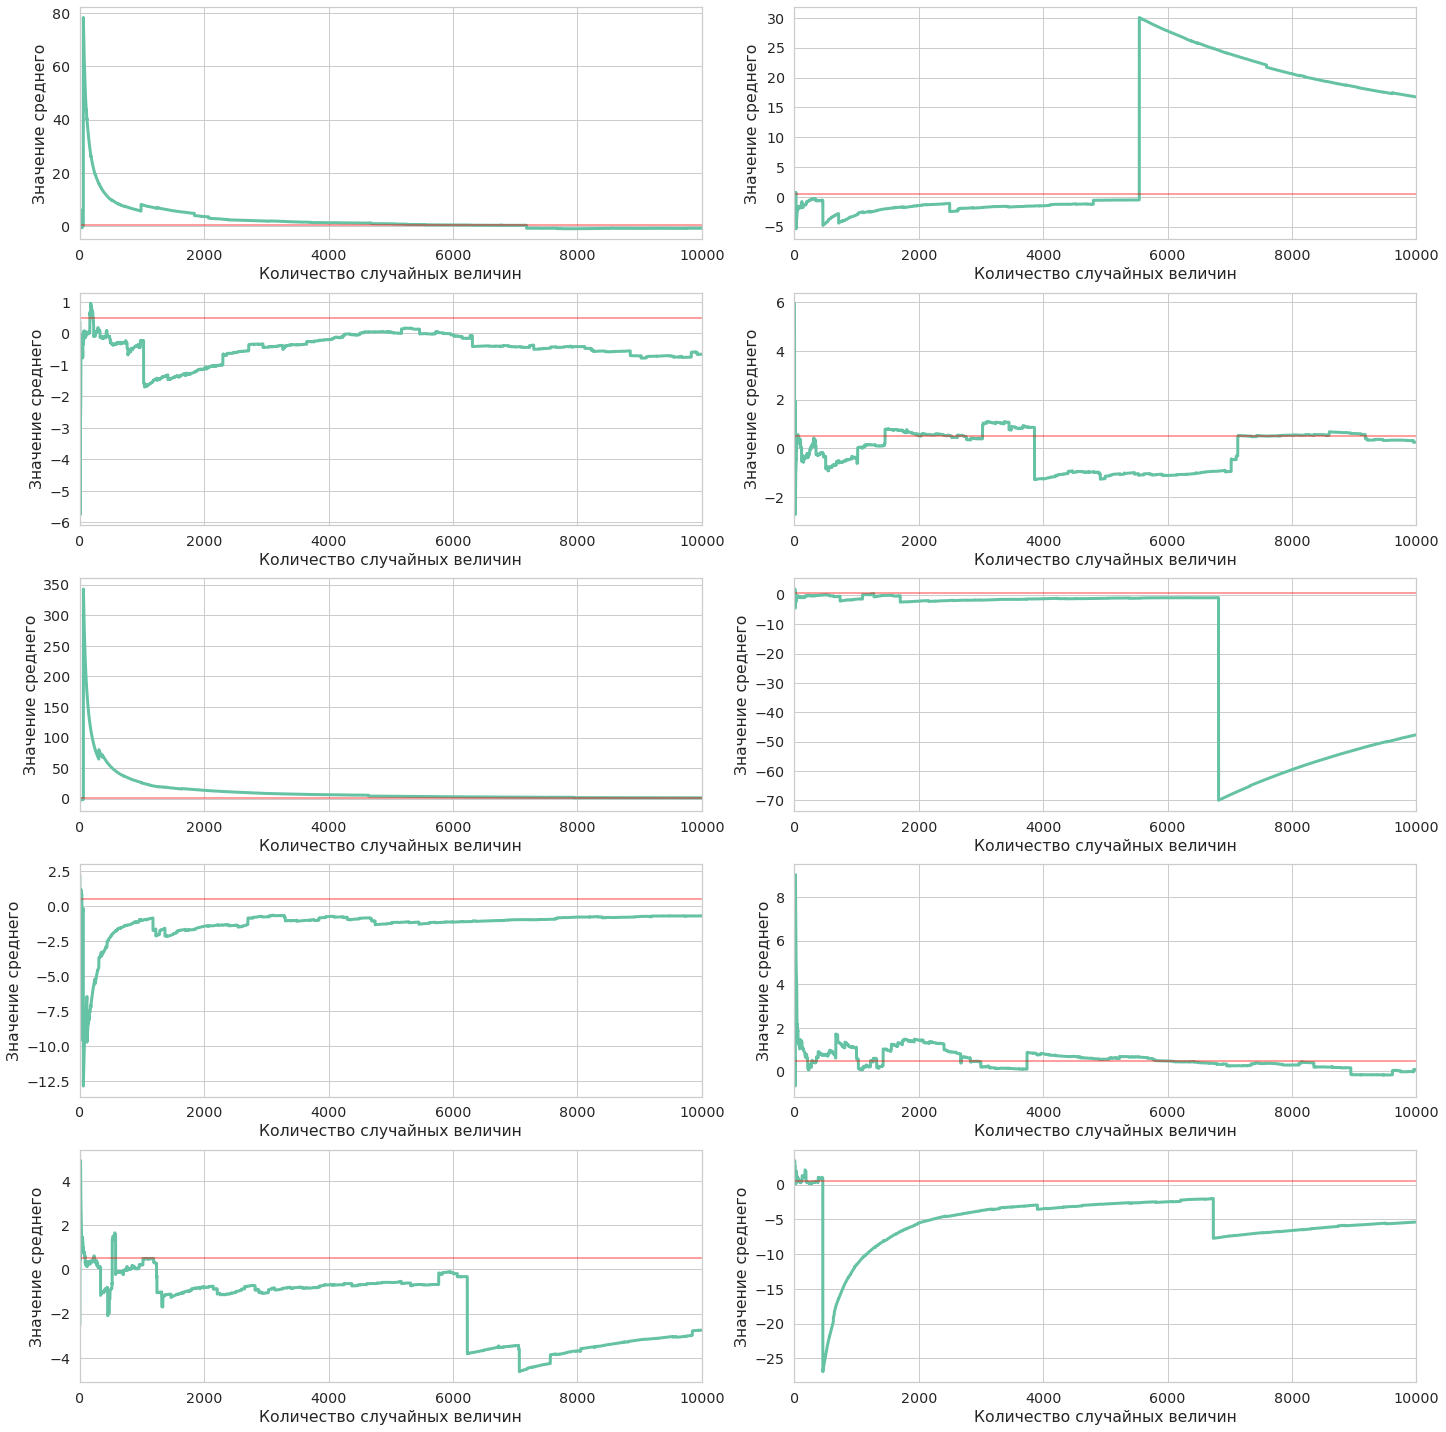

In [118]:
size = 10000
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.5, color='r')
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))

plt.tight_layout()

(-400.0, 400.0)

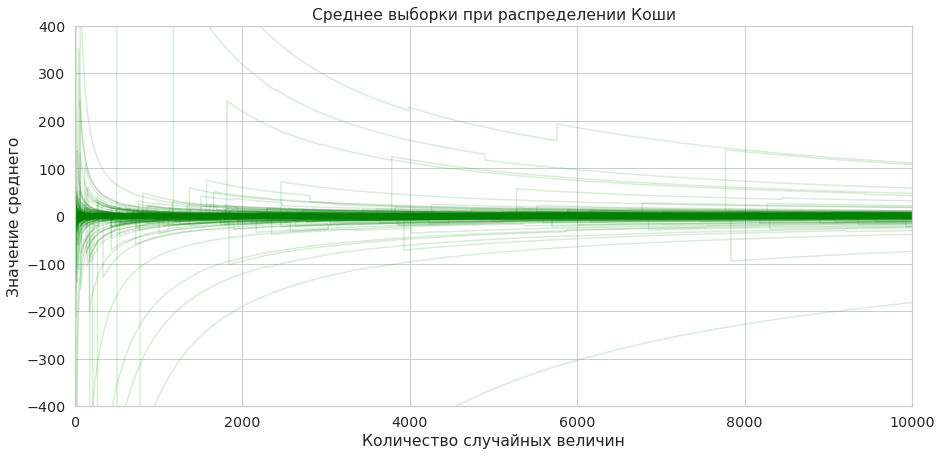

In [114]:
size = 10000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.15)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Среднее выборки при распределении Коши')
plt.xlim((0, size))
plt.ylim((-400, 400))

Для среднего ЗБЧ не выполняется $-$ видим большое количество выбросов, а также из 10 сгенерированных графиков нельзя вычленить что-то общее, всё выглядит очень хаотично.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

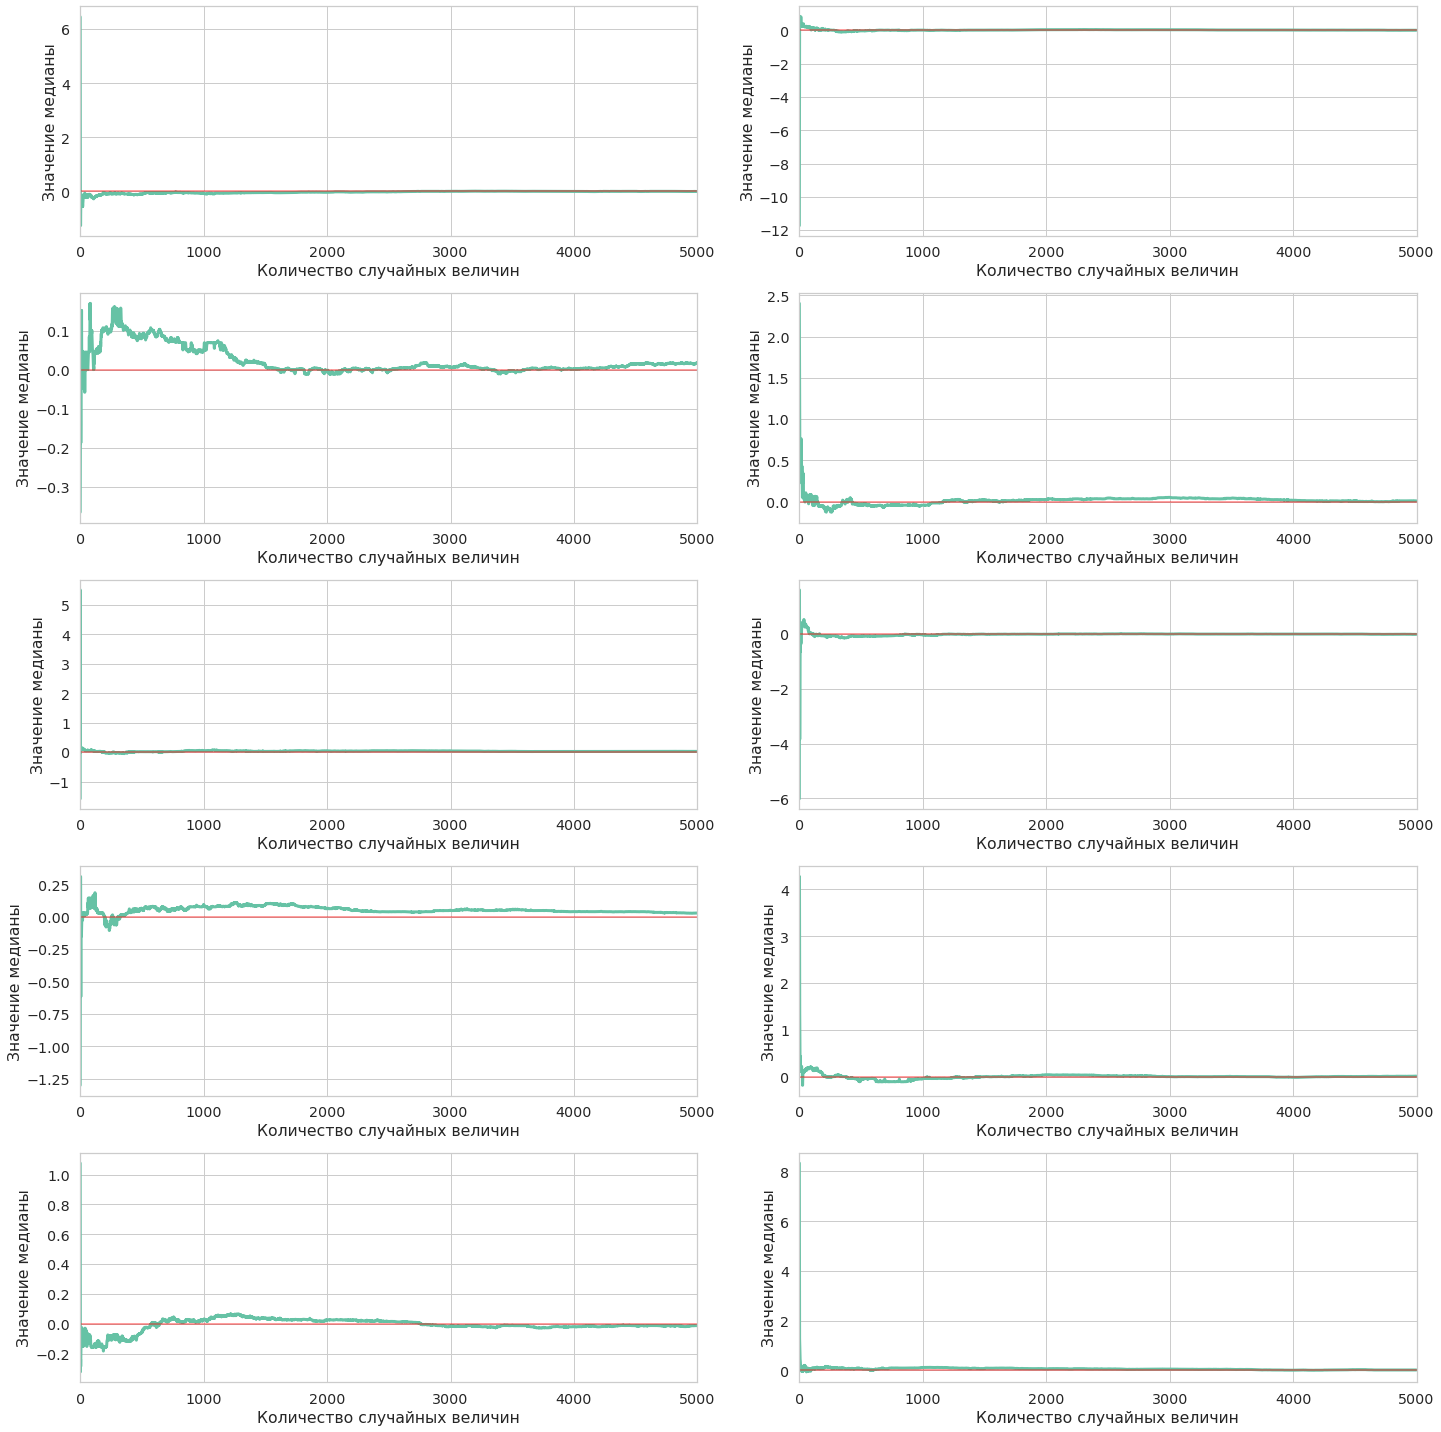

In [116]:
size = 5000
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    medians = np.array([np.median(samples[:j+1]) for j in range(size)])
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(medians, lw=3)
    plt.hlines(0, 0, size, alpha=0.5, color='r')
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение медианы')
    plt.xlim((-5, size))
    
plt.tight_layout()

(-2.0, 2.0)

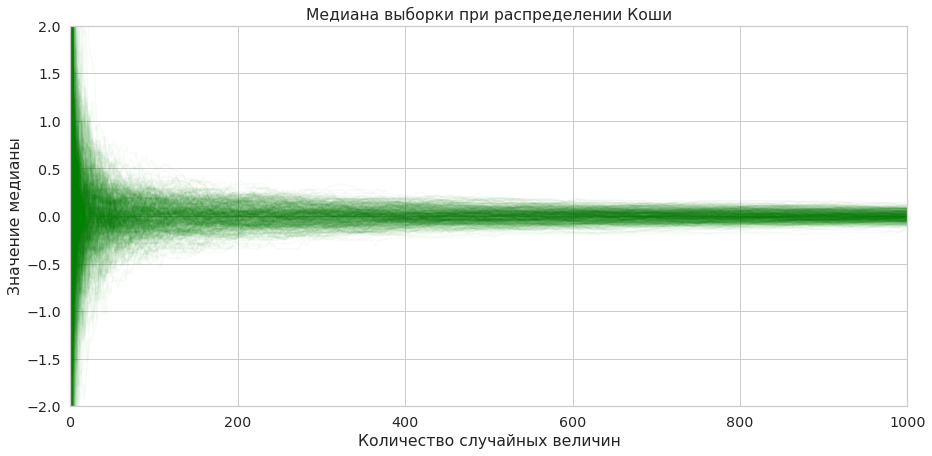

In [31]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
medians = np.array([np.median(samples[:, :j+1], axis=1) for j in range(size)])

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[:, i], color='green', alpha=0.03)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.title('Медиана выборки при распределении Коши')
plt.xlim((0, size))
plt.ylim((-2, 2))

**Вывод:**

Сравнили распределение Коши с нормальным: для него не выполняется Закон Больших Чисел, потому что среднее по выборке очень чувствительно к выбросам. Связано это с тем, что на бесконечности функция плотности убывает как $ \frac{1}{x^2}$ а также интеграл 
$$ \int \frac{x}{\pi (1+x^2)}dx $$
расходится, что позволяет большим числам портить сходимость среднего даже на выборках огромных размеров. 

Для медианы сходимость выполняется, потому что выбросы на этот параметр практически не влияют.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

При n = [451] достигается значение меры отклонения в 0.02


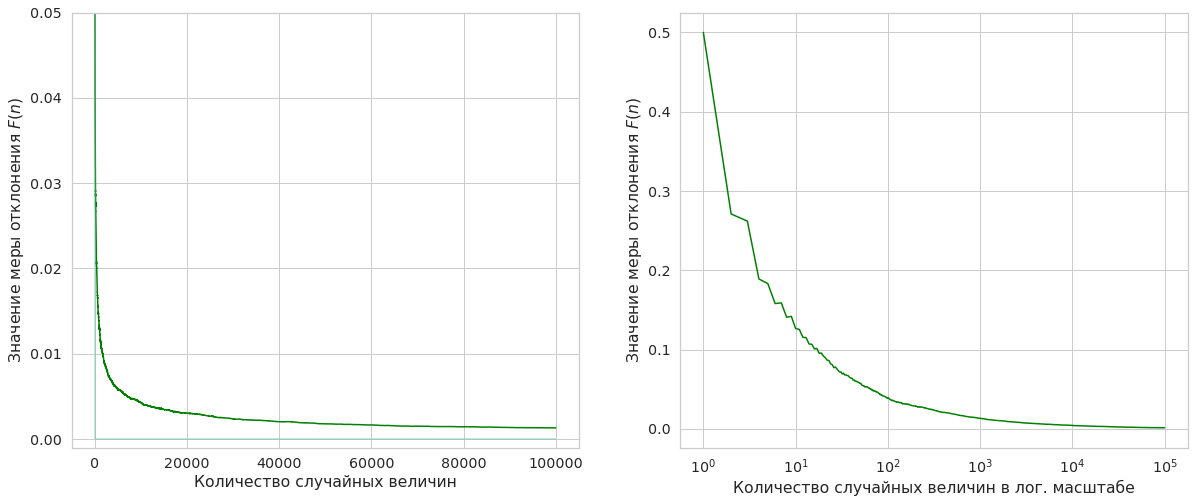

In [13]:
size = 100000  # количество случайных величин
samples_count = 500  # количество выборок

loc = 0.5

samples = sps.bernoulli(p=loc).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1) 

f_metric = np.mean(np.abs(cum_means - loc), axis=0)

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(np.arange(size) + 1, f_metric, color='green', alpha=1)
plt.hlines(0, 0, size, alpha=0.5)
plt.vlines(0, 0, 0.05, alpha=0.5)
plt.ylim((-0.001, 0.05))
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение меры отклонения $F(n)$')


plt.subplot(122)
plt.plot(np.arange(size) + 1, f_metric, color='green', alpha=1)
plt.xscale('log')
plt.xlabel('Количество случайных величин в лог. масштабе')
plt.ylabel('Значение меры отклонения $F(n)$')



divr = 0.02
print('При n = {} достигается значение меры отклонения в {}'.format(1+np.argwhere(f_metric<=divr)[0], divr))

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Text(0.5, 0, 'Матожидание')

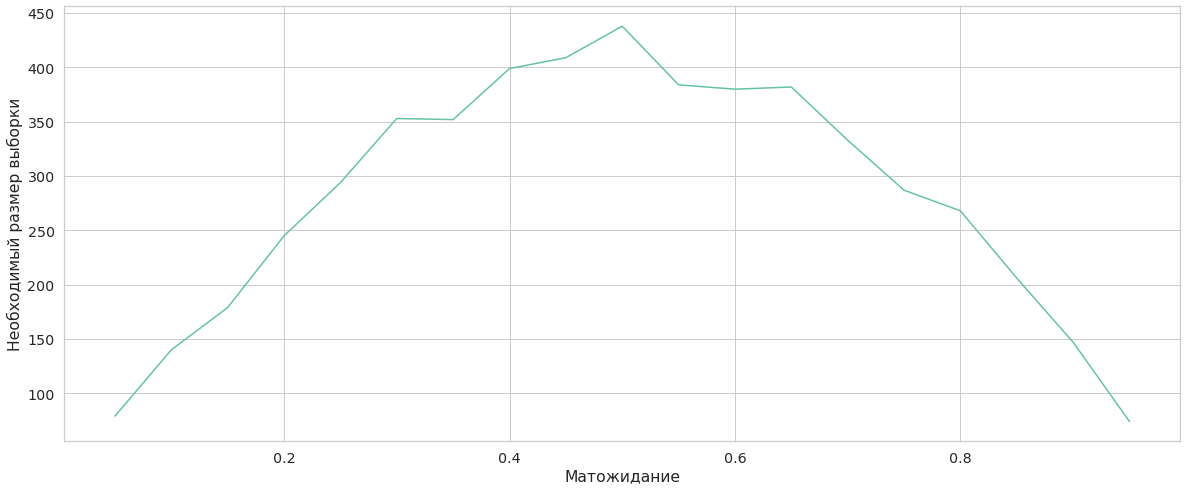

In [14]:
size = 100000
samples_count = 500

locs = np.arange(0.05, 1, 0.05)
opt_size = []

divr = 0.02

for loc in locs:
    samples = sps.bernoulli(p=loc).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1) 

    f_metric = np.mean(np.abs(cum_means - loc), axis=0)
    opt_size.append(1+np.argwhere(f_metric<=divr)[0])
    
plt.figure(figsize=(20, 8))
plt.plot(locs, opt_size)
plt.ylabel('Необходимый размер выборки')
plt.xlabel('Матожидание')

**Выводы:**

Оценили примерные размеры выборки для распределения Бернулли ($p=0.5$), при которых допустимо выбранное отклонение. 

По графикам поняли, что предложенная нам мера отклонения от среднего является показательной и благодаря ей можно дать довольно точную нижнюю оценку на размер выборки.

Также мы посчитали эти размеры для различных значений матожидания и получили в целом симметричную картину, что ожидаемо. Максимум при $p=0.5$ объясняется большей границей разброса случайных величин, потому что дисперсия $\sigma = p(1-p)$ имеет максимум именно в этой точке. 

#### Дополнение:

Отмечу ещё, что при построении графика (p = 0.5) значения меры отклонения от размера выборки, где обе оси взяты в логарифмическом масштабе, мы можем увидеть прямую линию. Её наклон примерно равен -2, отсюда можно грубо оценить зависимость $F(n)$:
$$ F(n) \sim \frac{1}{n^2}$$

Text(0, 0.5, 'Значение меры отклонения $F(n)$ в лог. масштабе')

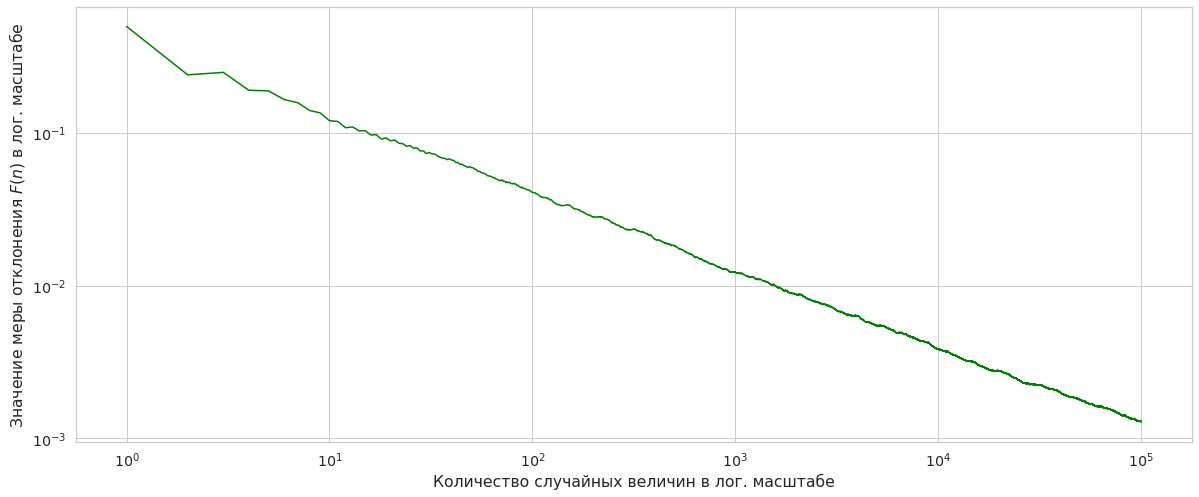

In [36]:
size = 100000  # количество случайных величин
samples_count = 500  # количество выборок

loc = 0.5

samples = sps.bernoulli(p=loc).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1) 

f_metric = np.mean(np.abs(cum_means - loc), axis=0)

plt.figure(figsize=(20, 8))
plt.plot(np.arange(size) + 1, f_metric, color='green', alpha=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Количество случайных величин в лог. масштабе')
plt.ylabel('Значение меры отклонения $F(n)$ в лог. масштабе')